In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import HTML

In [2]:
def eqs_dsdt(s,t,G,m):
    
    n = len(s)//4
    
    x = s[:n]
    y = s[n:2*n]
    vx = s[2*n:3*n]
    vy = s[3*n:4*n]
    
    eqs_dx = []
    eqs_dy = []
    eqs_dvx = []
    eqs_dvy = []
    
    for i in range(n):
        eqs_dx.append(vx[i])
        eqs_dy.append(vy[i])
        eqs_dvx.append(G*sum([m[j]/(((x[j]-x[i])**2+(y[j]-y[i])**2)**(3/2))*(x[j]-x[i]) for j in range(n) if j!=i]))
        eqs_dvy.append(G*sum([m[j]/(((x[j]-x[i])**2+(y[j]-y[i])**2)**(3/2))*(y[j]-y[i]) for j in range(n) if j!=i]))
        
    dS = eqs_dx + eqs_dy + eqs_dvx + eqs_dvy
    return dS

In [3]:
def initial(r0,v0):
    n = len(r0)
    x0 = []
    y0 = []
    vx0 = []
    vy0 = []
    for i in range(n):
        x0.append(r0[i][0])
        y0.append(r0[i][1])
        vx0.append(v0[i][0])
        vy0.append(v0[i][1])
    return x0 + y0 + vx0 + vy0

In [4]:
def simulate(t,r0,v0,G,m):
    s0 = initial(r0,v0)
    ans = sp.integrate.odeint(eqs_dsdt, y0=s0, t=t, args=(G,m))
    return ans

In [5]:
G = 0.198249

r01 = [0, 0] # Unidad Astronómica (UA)
r02 = [2, 0] # Unidad Astronómica (UA)
r03 = [3, 0] # Unidad Astronómica (UA)

v01 = [0, -0.49328] # UA/año
v02 = [0, 4.94227] # UA/año
v03 = [0, 2.10805] # UA/año

m = [250, 25, 0.1] # 10**28 kg

t = np.linspace(0, 3, 1001)
r0 = [r01, r02, r03]
v0 = [v01, v02, v03]

In [6]:
ans = simulate(t,r0,v0,G,m)

In [7]:
x1 = ans.T[0]
x2 = ans.T[1]
x3 = ans.T[2]
y1 = ans.T[3]
y2 = ans.T[4]
y3 = ans.T[5]

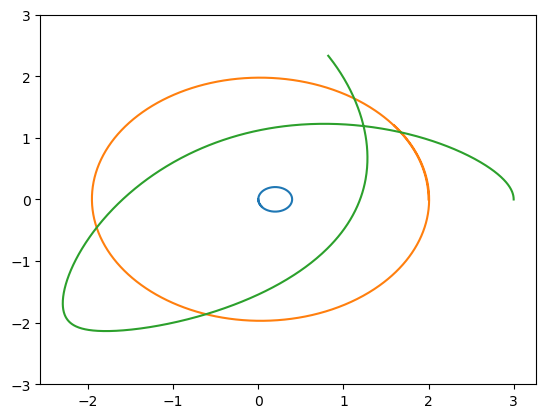

In [8]:
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
#plt.xlim([-4,4])
plt.ylim([-3, 3])
plt.show()

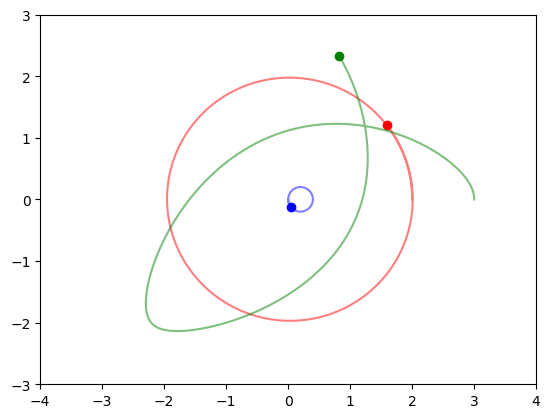

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(-4, 4)
ax.set_ylim(-3, 3)

points = [ax.plot([], [], 'bo')[0],  # Planeta 1
          ax.plot([], [], 'ro')[0],  # Planeta 2
          ax.plot([], [], 'go')[0]]  # Planeta 3

trajectories = [ax.plot([], [], 'b-', alpha=0.5)[0],  # Trayectoria planeta 1
                ax.plot([], [], 'r-', alpha=0.5)[0],  # Trayectoria planeta 2
                ax.plot([], [], 'g-', alpha=0.5)[0]]  # Trayectoria planeta 3

# Almacenamiento de las trayectorias
x_data = [[], [], []]
y_data = [[], [], []]

def init():
    for point, trajectory in zip(points, trajectories):
        point.set_data([], [])
        trajectory.set_data([], [])
    return points + trajectories

# def init():
#     for point in points:
#         point.set_data([], [])
#     return points

def update(frame):
    x_data = [x1[frame], x2[frame], x3[frame]]
    y_data = [y1[frame], y2[frame], y3[frame]]
    
    for i, (point, trajectory, x, y) in enumerate(zip(points, trajectories, [x1, x2, x3], [y1, y2, y3])):
        point.set_data(x_data[i], y_data[i])
        trajectory.set_data(x[:frame+1], y[:frame+1])
    
    return points + trajectories

# def update(frame):
#     x_data = [x1[frame], x2[frame], x3[frame]]
#     y_data = [y1[frame], y2[frame], y3[frame]]
    
#     for i, (point, x, y) in enumerate(zip(points, [x1, x2, x3], [y1, y2, y3])):
#         point.set_data(x_data[i], y_data[i])
    
#     return points

ani = FuncAnimation(fig, update, frames=len(x1), init_func=init, blit=True)

# Guardar la animación como un archivo .gif
ani.save('tres_planetas_animacion.gif', writer=PillowWriter(fps=20))
plt.show()
# Mostrar la animación
#HTML(ani.to_jshtml())